In [275]:
import pandas as pd
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data',header=None)

In [276]:
df_wine

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [277]:
df_wine.columns = [
'Class label',
'Alcohol',
'Malic acid',
'Alcalinity of ash',
'Magnesium',
'Flavanoids',
'Nonflavanoid phenols',
'Ash',
'Total phenols',
'Proanthocyanins',
'Color intensity',
'Hue',
'OD280/OD315 of diluted wines',
'Proline'
]
df_wine.head()

,Class label,Alcohol,Malic acid,Alcalinity of ash,Magnesium,Flavanoids,Nonflavanoid phenols,Ash,Total phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [278]:
from sklearn.model_selection import train_test_split

In [279]:
X = df_wine.iloc[:,1:].values # Features
y = df_wine.iloc[:,0].values # Target Labels

In [280]:
X.shape

(178, 13)

In [281]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=48)

In [282]:
# Print the sizes of the training and testing sets
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)}")

Training set size: 124 samples
Test set size: 54


### 3.3 PCA Dimensionality Reduction
Principal Component Analysis (PCA) is a dimensionality reduction technique widely used in machine learning and statistics to simplify high-dimensional datasets while a retaining as much of the data's variability as possible. The process of applying PCA for dimensionality reduction involves several key steps:

* (1) Data Preparation: Before starting PCA, it's essential to preprocess the data. This typically includes standardizing the features to have zero mean and unit variance, which is crucial for PCA since it is sensitive to the scale of variables.
  * StandardScaler is a preprocessing technique commonly used in machine learning for feature scaling. It transforms the features of the input dataset by performing a standardization operation, ensuring that the distribution of each feature has a mean of 0 and a standard deviation of 1, thereby bringing all features to the same scale.

In [283]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#scaler.fit(X_train)
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

* The covariance matrix shows how each pair of features varies together.
* High absolute values indicate strong correlations (useful for PCA).
* PCA works by finding directions (eigenvectors) of maximum variance in this matrix.
* The shape (13, 13) confirms the matrix covers all 13 features.
* Later, PCA will rank these directions by importance (eigenvalues) to reduce dimensions.

### Covariance Matrix

In [284]:
import numpy as np
cov_mat = np.cov(X_train_std.T)
cov_mat.shape

(13, 13)

### Eigenvalue Decomposition

In [285]:
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals) 


Eigenvalues 
[4.79238486 2.62792025 1.39308561 0.98592278 0.87537781 0.6705819
 0.48279911 0.09713136 0.31751144 0.29032342 0.23963852 0.15560255
 0.17741144]


In [286]:
# Calculate the total of the eigenvalues
tot = sum(eigen_vals)
# Calculate the percentage of variance explained by each eigenvalue
# List comprehension to calculate variance explained, sorted by eigenvalue magnitude in descending order
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True) ]
# Calculate the cumulative variance explained
cum_var_exp = np.cumsum(var_exp) # Cumulative sum of the explained variances

var_exp

[0.36567204559345845,
 0.20051748782092627,
 0.10629623480146864,
 0.07522859941866294,
 0.0667937163473259,
 0.05116722929762146,
 0.03683888983886919,
 0.02422698976513349,
 0.022152469566845797,
 0.018285072961015995,
 0.01353697733109915,
 0.011872899462518809,
 0.007411387795053824]

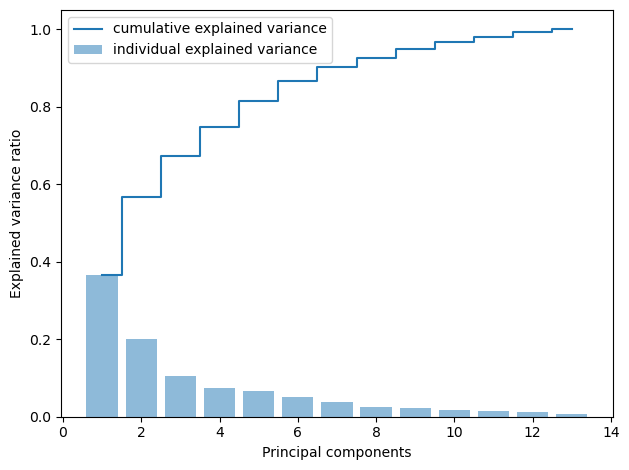

In [287]:
import matplotlib.pyplot as plt
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc= 'best')
plt.tight_layout()
plt.show()

In [288]:
# Construct a list of tuples, each containing an eigenvalue and its corresponding eigenvector.
# np. abs(eigen_vals[i]) computes the absolute value of the i-th eigenvalue to handle any potential sign inconsistency.
# eigen_vecs[:, i] extracts the i-th column vector (eigenvector) from the eigen_vecs matrix.
# This Loop iterates over the range of indices equivalent to the number of eigenvalues, creating a pair for each eigenvalue-vector combo.
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals) )]

# Sort the list of eigenvalue-eigenvector pairs based on the first element of each tuple (the eigenvalue).
# The key parameter in sort function specifies a function of one argument that is used to extract a comparison key from each input element.
# Here, we use a Lambda function Lambda k: k[e] which returns the first element of the tuple (the eigenvalue) .
# setting reverse=True ensures the sorting is done in descending order, meaning the tuple with the highest eigenvalue comes first.

eigen_pairs.sort(key=lambda k: k[0], reverse=True)
    
eigen_pairs

[(4.792384857696376,
  array([ 0.15665089, -0.25751677,  0.00524937, -0.24804323,  0.15272478,
          0.38029125,  0.42058583, -0.32160848,  0.29554616, -0.05912778,
          0.28682891,  0.37307024,  0.2950017 ])),
 (2.627920246888884,
  array([-4.85795595e-01, -2.31195791e-01, -3.91112205e-01, -7.45554344e-02,
         -2.35643992e-01, -6.98178486e-02,  2.67703410e-04, -8.73711553e-02,
         -5.01268570e-02, -5.04024398e-01,  2.79409319e-01,  1.26204380e-01,
         -3.65290369e-01])),
 (1.3930856138208718,
  array([ 0.18237532, -0.11797145, -0.52694618, -0.63714949, -0.00244807,
         -0.1677283 , -0.16287334, -0.17619201, -0.22169645,  0.23202655,
         -0.10088041, -0.20929948,  0.16282302])),
 (0.9859227826250774,
  array([-0.1070652 , -0.29241377,  0.23777491, -0.027828  ,  0.69606588,
         -0.26209408, -0.1850799 ,  0.06261639, -0.21012081, -0.19195245,
          0.34037929, -0.18250626,  0.15550055])),
 (0.8753778109909692,
  array([-0.2064539 ,  0.39333438, 

In [289]:
w = np.hstack((eigen_pairs[0][1][:, np.newaxis], eigen_pairs[1][1][:, np.newaxis]))

print('Matrix W:\n', w)

Matrix W:
 [[ 1.56650889e-01 -4.85795595e-01]
 [-2.57516773e-01 -2.31195791e-01]
 [ 5.24936728e-03 -3.91112205e-01]
 [-2.48043233e-01 -7.45554344e-02]
 [ 1.52724776e-01 -2.35643992e-01]
 [ 3.80291249e-01 -6.98178486e-02]
 [ 4.20585828e-01  2.67703410e-04]
 [-3.21608484e-01 -8.73711553e-02]
 [ 2.95546162e-01 -5.01268570e-02]
 [-5.91277839e-02 -5.04024398e-01]
 [ 2.86828914e-01  2.79409319e-01]
 [ 3.73070237e-01  1.26204380e-01]
 [ 2.95001704e-01 -3.65290369e-01]]


In [290]:
X_train_pca = X_train_std.dot(w)
X_test_pca = X_test_std.dot(w)
X_train_pca.shape

(124, 2)

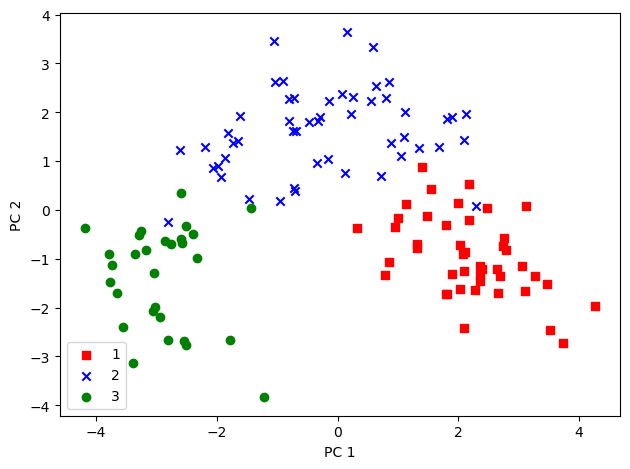

In [317]:
import matplotlib.pyplot as plt

# Define color and marker styles for different classes in the data
colors = ['r', 'b', 'g'] # Red, Blue, Green for class distinction
markers = ['s', 'x', 'o'] # Square, Cross, Circle for class distinction

# Iterate over unique class labels, colors, and markers simultaneously
for label, color, marker in zip(np.unique(y_train), colors, markers) :
    # Select data points for the current class label from the PCA-tnsformed training data
    # X_train_pca[y_train == L, 0] picks PC1 values, X_train_pca[y_train == L, 1] picks PC2 values
    plt.scatter(X_train_pca[y_train == label, 0],
                 X_train_pca[y_train == label, 1],
                 c=color,
                 label=label,
                 marker=marker)   # Use the corresponding marker for the class
                     
# Set the label for the x-axis to 'PC 1', representing the first principal component
plt.xlabel ('PC 1')
# Set the label for the y-axis to 'PC 2', representing the second principal component
plt.ylabel ('PC 2')
# Place the Legend in the lower left corner of the plot for clarity
plt.legend (loc='lower left')
# Adjust the plot to ensure all elements fit without overlapping
plt.tight_layout()
# Display the plot showing the scatter plot of PCA-transformed data colored and marked by class
plt.show()

In [318]:
# Importing necessary modules from scikit-Learn
from sklearn import svm 
from sklearn import metrics
import time # Importing the time module to measure execution time

# Section: Training and Evaluating SVM Without PCA
start_time = time.time()
# Initialize the Support Vector Classifier with a Linear kerneL
svm_no_pca = svm.SVC(kernel='linear')
# Train the model using the original training data (X_train) and corresponding Labels (y_train)
svm_no_pca.fit(X_train, y_train)
# Make predictions on the test dataset (X_test)
y_pred_no_pca = svm_no_pca.predict(X_test)
# Calculate the elapsed time for training and prediction without PCA
no_pca_time = time.time() - start_time
# Print the accuracy of the model trained without PCA
print("Without PCA - Accuracy:")
print (metrics.accuracy_score(y_test, y_pred_no_pca))

# Section: Training and Evaluating SVM With PCA
start_time = time.time()
# Initialize another Support Vector Classifier instance
svm_pca = svm.SVC(kernel='linear')
# This time, train the model using the PCA-transformed training data (X_train_pca)
svm_pca.fit(X_train_pca, y_train)
# Predict on the PCA-transformed test dataset (X_test_pca)
y_pred_pca = svm_pca.predict(X_test_pca)
pca_time = time.time() - start_time
# Print the accuracy of the model trained with PCA
print("\nWith PCA - Accuracy:")
print(metrics.accuracy_score(y_test, y_pred_pca))

# Compare and print the execution times
print("\nTime Comparison:")
print(f"No PCA: {no_pca_time} seconds, PCA: {pca_time} seconds")

Without PCA - Accuracy:
0.9444444444444444

With PCA - Accuracy:
0.2777777777777778

Time Comparison:
No PCA: 0.08996391296386719 seconds, PCA: 0.0006401538848876953 seconds


In [315]:
from sklearn.decomposition import PCA

# Initialize PCA for dimensionality reduction, keeping only 2 principal components
pca = PCA(n_components=2)

# Apply PCA transformation to standardized training dataset
x_train_pca = pca.fit_transform(X_train_std)

# Apply the same PCA transformation to standardized testing dataset (only transform)
X_test_pca = pca.transform(X_test_std)

# Initialize a Support Vector Machine (SVM) classifier with Linear kernel, regularization parameter C=1,
# and a random state for reproducibility
clf = svm.SVC(kernel='linear', C=1, random_state=42)

# Train the SVM classifier using the transformed training dataset
clf.fit(X_train_pca, y_train)

# Predict labels for the transformed testing dataset
y_pred = clf.predict(X_test_pca)

# Calculate and print the accuracy score comparing predicted labels with actual labels of the testing dataset
print(metrics.accuracy_score(y_test, y_pred))

0.2777777777777778


In [316]:
# Import the PCA class from the decomposition module of the scikit-learn Library
from sklearn.decomposition import PCA

# Initialize the PCA object with 13 (all) as the number of principal components to be kept
pca = PCA(n_components=13)

# Fit the PCA model to the standardized training dataset (X_train_std) and transform it
X_pca = pca.fit_transform(X_train_std)

# Compute the ratio of the explained variance of each principal component
explained_variance = pca.explained_variance_ratio_

# Print the explained variance as a percentage for each principal component
print("Explained Variance by Principal Components:")

# Enumerate is used to iterate over explained_variance with an index starting from 1
for i, var in enumerate(explained_variance, start=1) :
    # Format the output to display the index of the PC and its explained variance in percentage
    print(f"PC {i}: {var*100:.2f}%")

Explained Variance by Principal Components:
PC 1: 36.57%
PC 2: 20.05%
PC 3: 10.63%
PC 4: 7.52%
PC 5: 6.68%
PC 6: 5.12%
PC 7: 3.68%
PC 8: 2.42%
PC 9: 2.22%
PC 10: 1.83%
PC 11: 1.35%
PC 12: 1.19%
PC 13: 0.74%


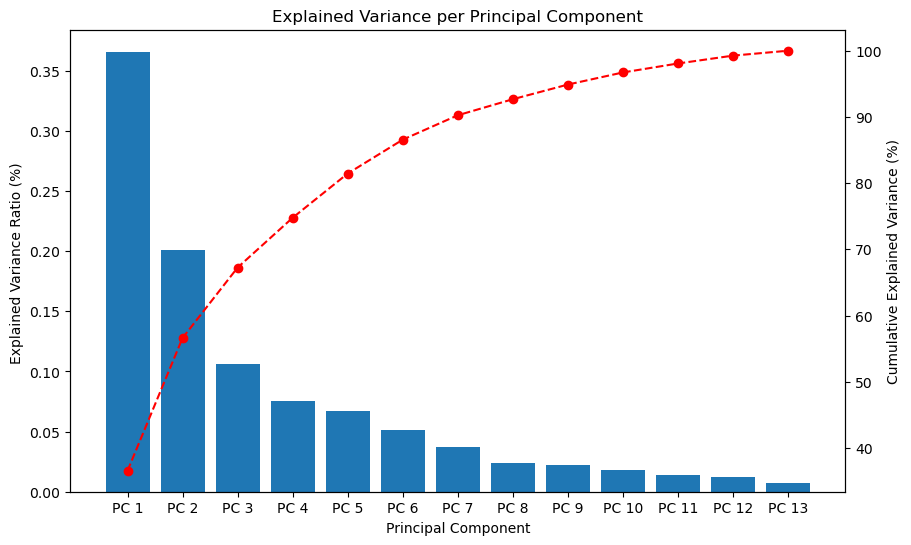

In [306]:
# Import the necessary Library for plotting
import matplotlib. pyplot as plt

# Calculate the cumulative explained variance using numpy's cumsum function
cumulative_explained_variance = np.cumsum(explained_variance)

# Create a new figure with specified size
plt.figure(figsize=(10, 6))

# Draw a bar chart to visualize individual explained variance ratios for each principal component
# The x-axis represents the principal components (Labeled PC 1, PC 2, etc.)
# The y-axis shows the percentage of variance explained by each component
plt.bar(range(1, len(explained_variance)+1), explained_variance,
    tick_label=[f'PC {i}' for i in range(1, len(explained_variance) +1)])
plt.ylabel('Explained Variance Ratio (%) ') 
plt.xlabel('Principal Component')

# Add another y-axis to the plot for cumulative explained variance
plt.twinx()

# Plot the cumulative explained variance as a line chart with markers and a dashed Line style
plt.plot(range(1, len(cumulative_explained_variance)+1), cumulative_explained_variance*100, color='r', marker='o', linestyle='--')
plt.ylabel('Cumulative Explained Variance (%)')

# Set the title of the plot
plt.title('Explained Variance per Principal Component')

# Display the plot
plt.show()

In [296]:
print("Train mean:", np.mean(X_train_std, axis=0))  # Should be ~0
print("Test mean:", np.mean(X_test_std, axis=0))    # Should NOT be 0

Train mean: [ 1.54714951e-15  1.11201371e-15  4.18392919e-15  1.99482008e-15
 -2.22044605e-16  1.14335065e-15  5.13925819e-16 -5.53320830e-16
  2.40667701e-15 -1.28929125e-16  1.39046480e-15  2.22223673e-15
  8.14760445e-17]
Test mean: [ 0.08100007  0.14294325  0.30371206  0.42037009  0.03091444 -0.31592019
 -0.16565481  0.01939858 -0.17134097  0.0723429  -0.21010379 -0.13134291
 -0.09043598]


In [297]:
print("Explained variance:", pca.explained_variance_ratio_)


Explained variance: [0.36567205 0.20051749 0.10629623 0.0752286  0.06679372 0.05116723
 0.03683889 0.02422699 0.02215247 0.01828507 0.01353698 0.0118729
 0.00741139]
